 #  Student Performance prediction 

## Data set

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:

df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Data Inspection


### overall inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- There are 1000 rows and 8 columns
- Data types 
    - 3 integer
    - 5 object
- The memory usage is 62.6KB

In [4]:
df.duplicated().sum()

0

There is no duplicate value

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no null value

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Math score
    - The averge math score is 66.08
    - Standard deviation on math score is 15.16
    - min score is 0
    - max score is 100
    - 25% of student math  score is 57
    - 50% of student math score is 66
    - 75% of student math score is 77

- Reading score

    - The averge reading score is 69.17
    - standard deviation is 14.60
    - minmum reading score is 17.00
    - maximum reading score is 100
    - 25% of student reading score is 59
    - 50% of student reading score is 70
    - 75% of student reading score is 79

- Writing score
    - The average writing score is 68.05
    - Statndard deviation is 15.19
    - minimum writing score is 10
    - maximum writing score is 100
    - 25% of student writing score is 57.75
    - 50% of student writing score is 69
    - 75% of student writing score is 79

### individual inspection

#### gender

In [2]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [23]:
px.pie(names=df['gender'],title="gender")

#### lunch

In [5]:
df['lunch'].value_counts(dropna=False)

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [22]:
px.pie(names=df['lunch'],title="Lunch")

#### Math score

In [11]:
math_score=df['math score'].value_counts().reset_index()
math_score.columns=['math score','count']
math_score

,math score,count
0,65,36
1,62,35
2,69,32
3,59,32
4,61,27
...,...,...
76,24,1
77,28,1
78,33,1
79,18,1


In [21]:
px.bar(math_score,x='math score',y='count',title="Math score")

#### parent education

In [16]:
parent_education=df['parental level of education'].value_counts(dropna=False).reset_index()
parent_education.columns=['education','count']
parent_education

,education,count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [20]:
px.bar(parent_education,x='education',y='count',title="Parent's education")

#### Ethinicity

In [18]:
ethinicity=df['race/ethnicity'].value_counts(dropna=False).reset_index()
ethinicity.columns=['ethinicity','count']
ethinicity

,ethinicity,count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


In [19]:
px.pie(ethinicity,names='ethinicity',values='count')

#### REading score

In [25]:
reading_score=df['reading score'].value_counts(dropna=False).reset_index()
reading_score.columns = ['reading score', 'count']
reading_score

,reading score,count
0,72,34
1,74,33
2,64,32
3,67,30
4,73,30
...,...,...
67,28,1
68,26,1
69,17,1
70,32,1


In [26]:
px.bar(reading_score,x='reading score',y='count',title="Reading score")

#### Test course preparation

In [29]:
test_preparation=df['test preparation course'].value_counts(dropna=False).reset_index()
test_preparation.columns=['test preparation course','count']
test_preparation

,test preparation course,count
0,none,642
1,completed,358


In [30]:
px.pie(test_preparation,names='test preparation course',values="count",title="Test preparation course")

#### writing score

In [32]:
writing_score=df['writing score'].value_counts(dropna=False).reset_index()
writing_score.columns=['Writing score','count']
writing_score

,Writing score,count
0,74,35
1,70,33
2,68,31
3,73,28
4,80,27
...,...,...
72,28,1
73,35,1
74,19,1
75,22,1


In [33]:
px.bar(writing_score,x='Writing score',y='count',title="Writing score")

## Data visualization

### Bi variate

#### gender lunch


In [ ]:
gender_lunch=df.groupby(['gender','lunch']).size().reset_index()
gender_lunch.columns=['gender','lunch','count']
gender_lunch

,gender,lunch,count
0,female,free/reduced,189
1,female,standard,329
2,male,free/reduced,166
3,male,standard,316


In [44]:
import plotly.express as px

# Create a combined label for each slice
gender_lunch['combo'] = gender_lunch['gender'] + ' - ' + gender_lunch['lunch']

fig = px.pie(
    gender_lunch,
    values='count',
    names='combo',
    title='Gender & Lunch Distribution'
)
fig.show()


#### gender_math

In [45]:
px.box(df,x='gender',y='math score')

#### test_preparation_math

In [4]:
test_math_score=df.groupby('test preparation course')['math score'].mean().reset_index()
test_math_score.columns=['test_preparation','maths_score']
test_math_score

,test_preparation,maths_score
0,completed,69.695531
1,none,64.077882


In [9]:
px.bar(test_math_score,y='maths_score',x='test_preparation')

#### test reading score

In [6]:
test_read_score=df.groupby('test preparation course')['reading score'].mean().reset_index()
test_read_score.columns=['test preparation','reading score']
test_read_score

,test preparation,reading score
0,completed,73.893855
1,none,66.534268


In [8]:
px.bar(test_read_score,x='test preparation',y='reading score')

#### test writing score

In [11]:
test_write_score=df.groupby('test preparation course')['writing score'].mean().reset_index()
test_write_score.columns=["test preparation",'writing score']
test_write_score

,test preparation,writing score
0,completed,74.418994
1,none,64.504673


In [12]:
px.bar(test_write_score,x='test preparation',y='writing score')

### Multivariate

#### Math_reading_gender

In [13]:
px.scatter(df,x='math score',y='reading score',color='gender')

c:\Users\sujit\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### math writing gender

In [15]:
px.scatter(df,x='math score',y='writing score',color='gender')

c:\Users\sujit\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [14]:
px.scatter_3d(df,x='math score',y='writing score',z='reading score',color='gender')

c:\Users\sujit\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
avg_scores


,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


In [20]:
px.bar(avg_scores, x='parental level of education', y=['math score', 'reading score', 'writing score'],barmode='group' )

c:\Users\sujit\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: >

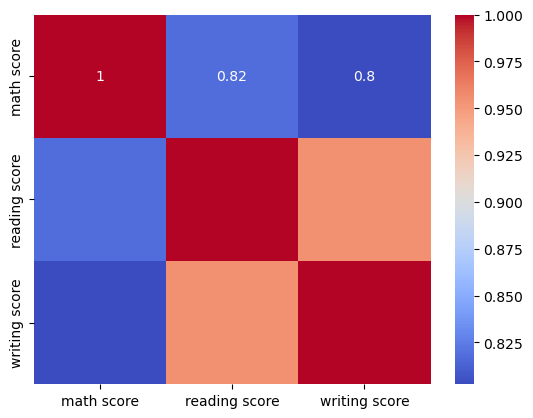

In [22]:
sns.heatmap(df[['math score','reading score', "writing score"]].corr(),annot=True,cmap='coolwarm')

## feature extraction


In [13]:
# df['pass'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)

In [25]:
# df['pass'] = df[['math score','reading score','writing score']].mean(axis=1).apply(lambda x: 1 if x >= 50 else 0)
#


In [24]:
# df['pass'].value_counts()

In [26]:
df['pass'] = ((df['math score'] >= 50) & 
              (df['reading score'] >= 50) & 
              (df['writing score'] >= 50)).astype(int)


## Model building


In [27]:
features=['math score','reading score','writing score']

In [16]:
print(type(features))

<class 'list'>


In [28]:
x=df[features]
y=df['pass']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y_pred,y_test)
print("Accuracy score",acs)

Accuracy score 0.95


In [34]:
import joblib
joblib.dump(model,"student_pass_model.pkl")

['student_pass_model.pkl']